

<H1>Методы интеллектуального анализа текстов</H1>
<H2>Тема 2. Токенизация</H2>




In [158]:
import glob
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re

In [32]:
data = []
for path in glob.glob('./news_science/*'):
    texts = []
    for filename in tqdm(glob.glob(path + '/*.txt')):
        texts.append(open(filename, 'r').read().strip())

    data.append(pd.DataFrame({'text': texts}))
    data[-1]['genre'] = path.split('/')[-1][:3]  # 'new' или 'sci'

data = pd.concat(data)
data.sample(3)

100%|██████████| 79/79 [00:00<00:00, 1548.84it/s]


,text,genre
16,Депутат Законодательного собрания Санкт-Петерб...,new
2,Африка в последние недели не исчезает из фокус...,new
58,Новости о грядущей эмиссии в США обвалили долл...,new


### Задача 1. 	Изобразить облака слов для научных и новостных текстов (wordcloud, без стоп-слов).

In [66]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/ilya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ilya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
# Вытаскиваем из датафрема колонку с текстом
wt = []
for index, row in data.iterrows():
    wt.append(row['text'])
# Фильтруем символы перехода строк
for i in range(len(wt)):
    wt[i] = re.sub(r'\n|\\n', '', wt[i])
wt = str(wt)
# print(wt)

**Вариант с одним текстом**

In [159]:
# Вытащим ограниченное количество текста из датафрейма для более красивой визуализации
wt_some = data.iat[1,0]

**Визуализация с одним текстом и обычным набором стоп-слов**

In [160]:
stopwords = set(stopwords.words('russian'))
# print(stopwords) # Выводил стоп слова, чтобы проверить наличие определенных слов (Например, "это")
word_tokens = word_tokenize(wt_some)
filtered_sentence = ' '.join([w for w in word_tokens if w.lower() not in stopwords]) # Проверяем токены на наличее в стоплисте
wordcloud = WordCloud().generate(filtered_sentence)

(-0.5, 399.5, 199.5, -0.5)

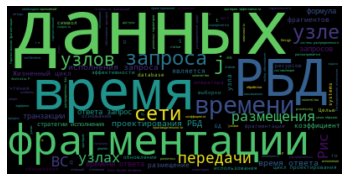

In [161]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

**Вариант с всеми текстами и обычным набором стоп-слов**

In [ ]:
stopwords = set(stopwords.words('russian'))
# print(stopwords) # Выводил стоп слова, чтобы проверить наличие определенных слов (Например, "это")
word_tokens = word_tokenize(wt)
filtered_sentence = ' '.join([w for w in word_tokens if w.lower() not in stopwords]) # Проверяем токены на наличее в стоплисте
wordcloud = WordCloud().generate(filtered_sentence)

(-0.5, 399.5, 199.5, -0.5)

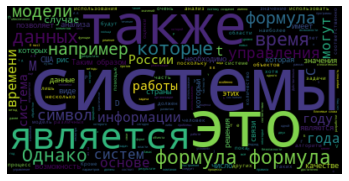

In [140]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

**Вариант с всеми текстами и кастомным набором стоп-слов**

In [ ]:
with open('stop_words_russian.txt', 'r', encoding='utf-8') as f:
    s_words = f.readlines()
for i in range(len(s_words)):
    s_words[i] = re.sub(r'\n', '', s_words[i])
word_tokens = word_tokenize(wt)
filtered_sentence = ' '.join([w for w in word_tokens if w.lower() not in s_words])
wordcloud = WordCloud().generate(filtered_sentence)

(-0.5, 399.5, 199.5, -0.5)

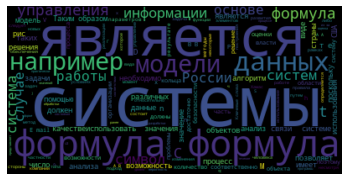

In [137]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Задача 2.	Найти частотные n-граммы новостных и научных статей.

### Задача 3.	С помощью TF-IDF вывести ключевые слова для двух новостных текстов.

In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer # Импортируем нужную библиотеку

In [165]:
# Вытаскиваем нужные тексты
news = data.loc[data['genre'] == 'new']
text_a = news.iat[1,0]
text_b = news.iat[2,0]

In [193]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([text_a, text_b]) # преобразовываем тексты в частотные векторы слова с помощью TfidfVectorizer
names = vectorizer.get_feature_names_out() # Получаем названия фич для преобразований
density = vectors.todense() # Определяем плотность
d_list = density.tolist() # Переводим в список
df = pd.DataFrame(d_list, columns=names)

In [198]:
df.sample(2)

,10,150,2001,2002,2003,2005,2008,36,38,70,...,является,являются,ядер,ядерного,ядерном,ядра,ядро,языков,яр,яркостью
1,0.023823,0.023823,0.023823,0.016950,0.023823,0.023823,0.023823,0.023823,0.023823,0.023823,...,0.067800,0.000000,0.000000,0.023823,0.023823,0.000000,0.000000,0.023823,0.047645,0.000000
0,0.000000,0.000000,0.000000,0.027606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027606,0.038799,0.038799,0.000000,0.000000,0.077599,0.077599,0.000000,0.000000,0.038799


### Задача 4.	Сравнить качество жанровой классификации на TF-IDF-векторах с использованием двух различных токенизаторов (на словах и на частях слов).